<a href="https://colab.research.google.com/github/Sandymyatnoe/Sandymyatnoe/blob/main/Multiclassification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [58]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [59]:
from typing import no_type_check

X,y=make_blobs(n_samples=1000,
               n_features=2,
               centers=6,
               cluster_std=1.5,
               random_state=42)
len(X), len(y), type(X), type(y)

(1000, 1000, numpy.ndarray, numpy.ndarray)

In [60]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.LongTensor)
#

In [61]:
X[:5], y[:5]

(tensor([[ -6.3093,  -5.9642],
         [  2.5286,   0.8064],
         [ -7.6808,   3.0507],
         [ -6.0399,  -5.2589],
         [-10.5505,  10.0461]]),
 tensor([2, 1, 3, 2, 5]))

In [62]:
X.dtype, y.dtype

(torch.float32, torch.int64)

In [63]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test=train_test_split(X,y,test_size=0.2,
                                                                      random_state=42)

In [64]:
len(X_blob_train), len(X_blob_test), len(y_blob_train), len(y_blob_test)

(800, 200, 800, 200)

Text(0.5, 1.0, 'Test Data')

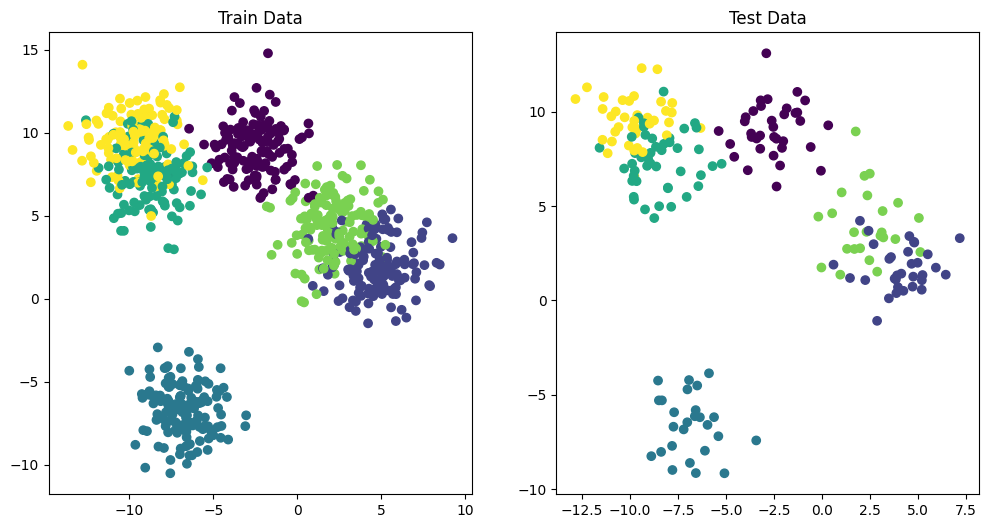

In [65]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x=X_blob_train[:,0],
            y=X_blob_train[:,1],
            c=y_blob_train)
plt.title("Train Data")

plt.subplot(1,2,2)
plt.scatter(x=X_blob_test[:,0],
            y=X_blob_test[:,1],
            c=y_blob_test)
plt.title("Test Data")

In [66]:
class Blobmodel(nn.Module):
  def __init__(self,input_f, output_f, hidden_units=8):
    super().__init__()

    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_f, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_f)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

model=Blobmodel(input_f=2,
                output_f=6,
                hidden_units=8).to(device)

model

Blobmodel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=6, bias=True)
  )
)

In [67]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.1)

In [68]:
model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.276

In [69]:
def accuracy_fn(y_true, y_preds):
  correct=torch.eq(y_true, y_preds).sum().item()
  acc=(correct/len(y_true))*100

  return acc

In [70]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_train, y_blob_train=X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test=X_blob_test.to(device), y_blob_test.to(device)

epochs=3000

for epoch in range(epochs):

  model.train()

  y_logits=model(X_blob_train).squeeze()
  y_preds=torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss=loss_fn(y_logits, y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                  y_preds=y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():

    test_logits=model(X_blob_test).squeeze()
    test_preds=torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss=loss_fn(test_logits, y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,
                         y_preds=test_preds)

  if epoch%100==0:
    print(f"Epoch:{epoch}| Train Loss:{loss}, Train Acc:{acc}| Test loss:{test_loss}, Test acc:{test_acc}")




Epoch:0| Train Loss:1.777201533317566, Train Acc:17.75| Test loss:1.7208231687545776, Test acc:12.0
Epoch:100| Train Loss:0.5168541669845581, Train Acc:78.5| Test loss:0.5208273530006409, Test acc:76.0
Epoch:200| Train Loss:0.3949248194694519, Train Acc:79.25| Test loss:0.43936049938201904, Test acc:77.0
Epoch:300| Train Loss:0.3635711967945099, Train Acc:82.125| Test loss:0.4146331548690796, Test acc:80.0
Epoch:400| Train Loss:0.3455337882041931, Train Acc:84.375| Test loss:0.3981766998767853, Test acc:81.5
Epoch:500| Train Loss:0.33554747700691223, Train Acc:85.375| Test loss:0.3889298737049103, Test acc:83.5
Epoch:600| Train Loss:0.3280487060546875, Train Acc:86.625| Test loss:0.3811689019203186, Test acc:83.5
Epoch:700| Train Loss:0.32288482785224915, Train Acc:87.0| Test loss:0.3751656711101532, Test acc:84.0
Epoch:800| Train Loss:0.3172489404678345, Train Acc:87.375| Test loss:0.36836689710617065, Test acc:84.5
Epoch:900| Train Loss:0.3125426173210144, Train Acc:87.625| Test loss

In [71]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


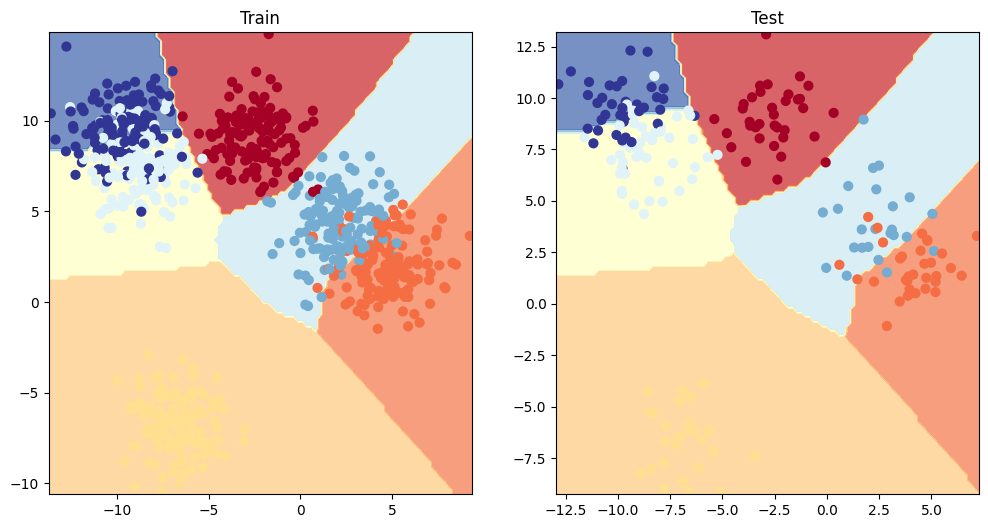

In [72]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)